In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split

In [32]:
df = pd.read_csv('data.csv', index_col=0).drop('Unnamed: 32',1)

In [33]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
cols = list(df.columns)

In [74]:
del cols[0]

In [223]:
X = df[cols]
y = df.iloc[:,0]

In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
scaler = StandardScaler()

In [226]:
X_scaled = scaler.fit_transform(X)

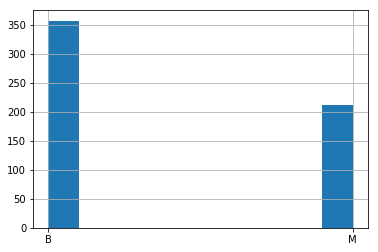

In [227]:
y.hist()

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


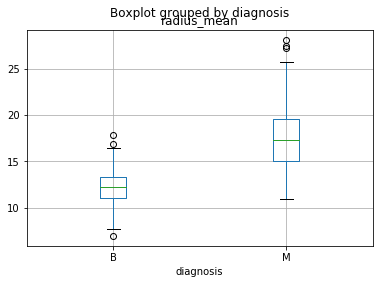

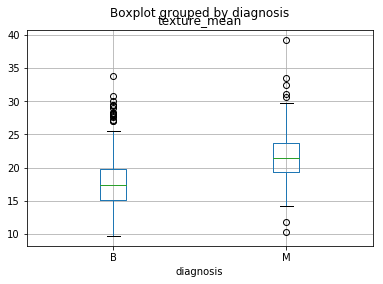

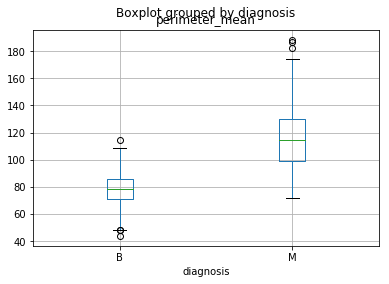

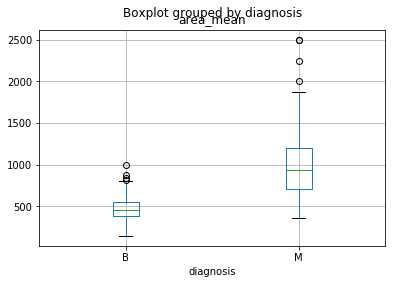

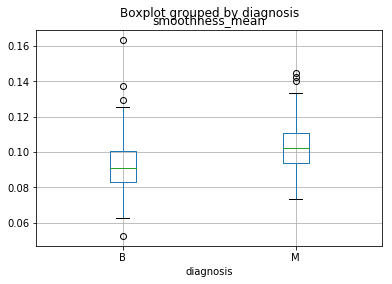

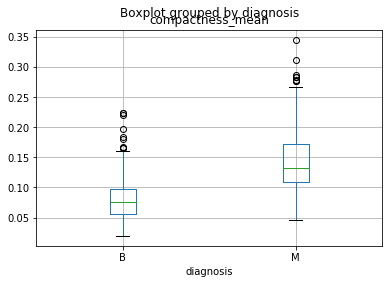

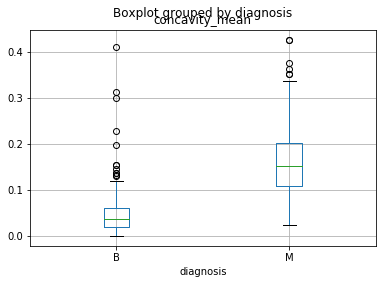

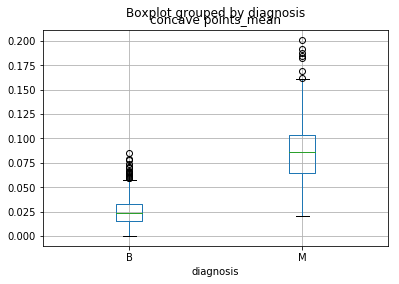

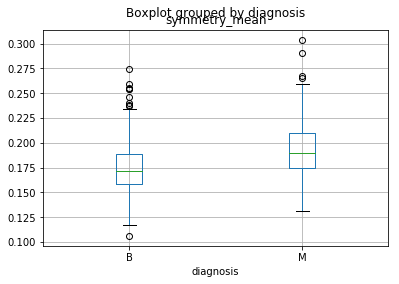

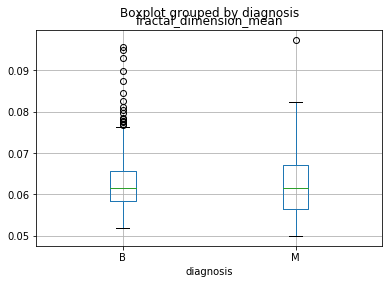

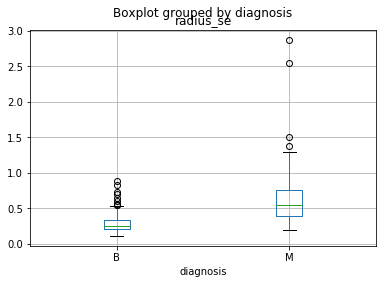

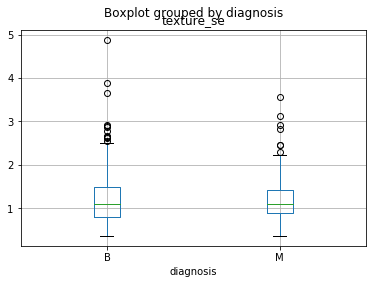

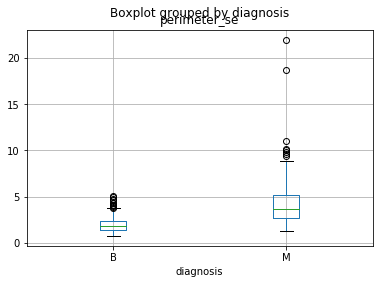

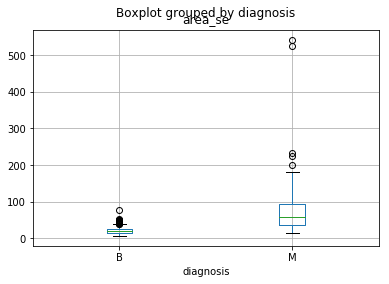

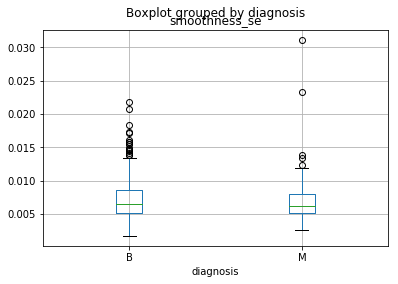

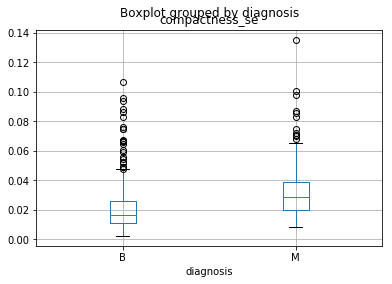

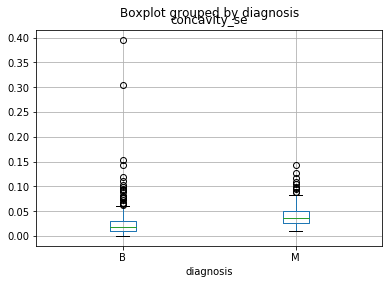

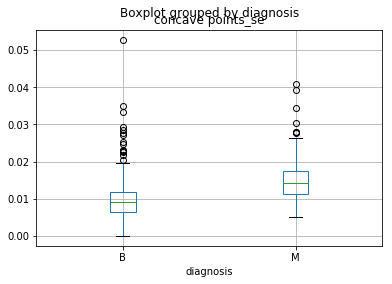

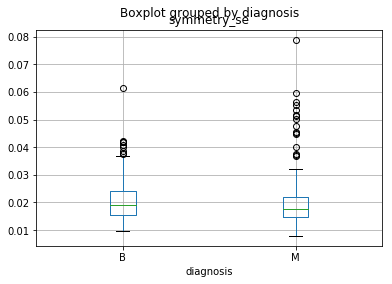

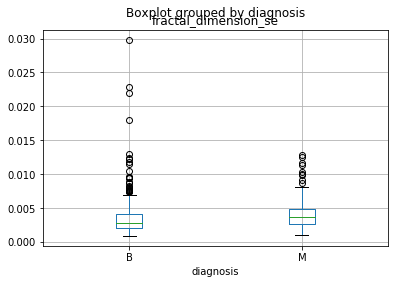

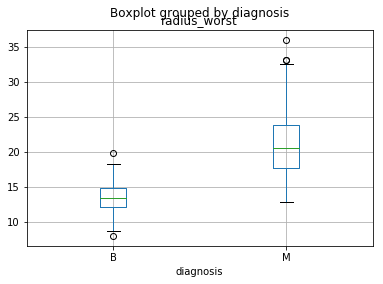

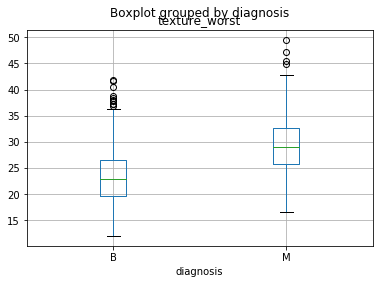

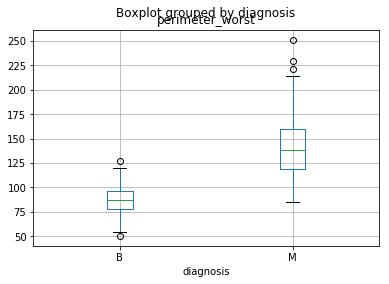

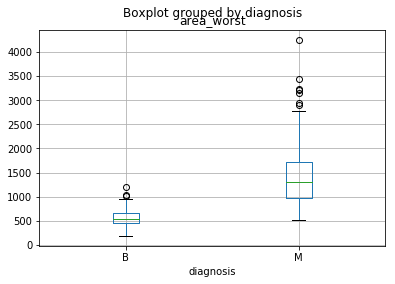

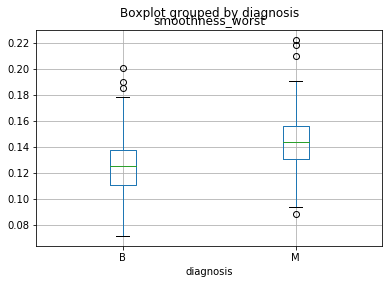

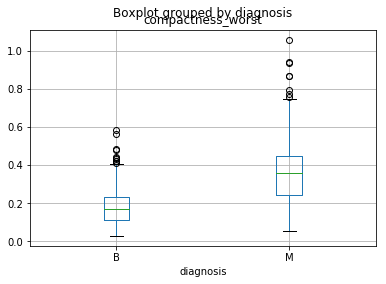

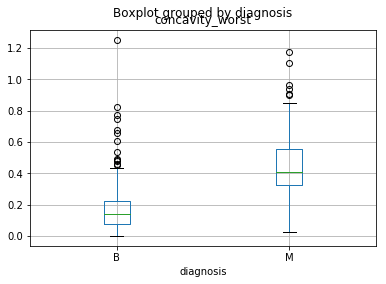

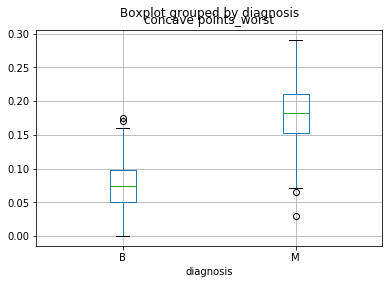

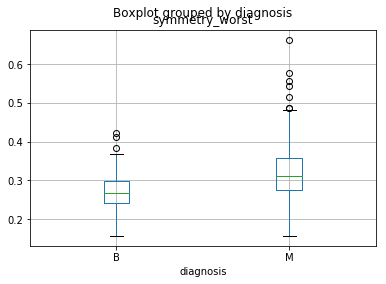

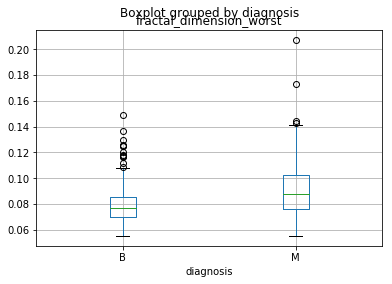

In [192]:
plots = [df.boxplot(column=i, by='diagnosis', grid=True) for i in cols]

In [1]:
# Filter

In [193]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [194]:
model = LinearDiscriminantAnalysis(n_components=2)

In [195]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [197]:
import numpy as np

In [198]:
np.array(cols)[np.where(np.abs(model.coef_)>1)[1]]

array(['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
       'concave points_mean', 'smoothness_se', 'concavity_se',
       'concave points_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'fractal_dimension_worst'], dtype='<U23')

In [200]:
model.score(X_test,y_test)

0.9736842105263158

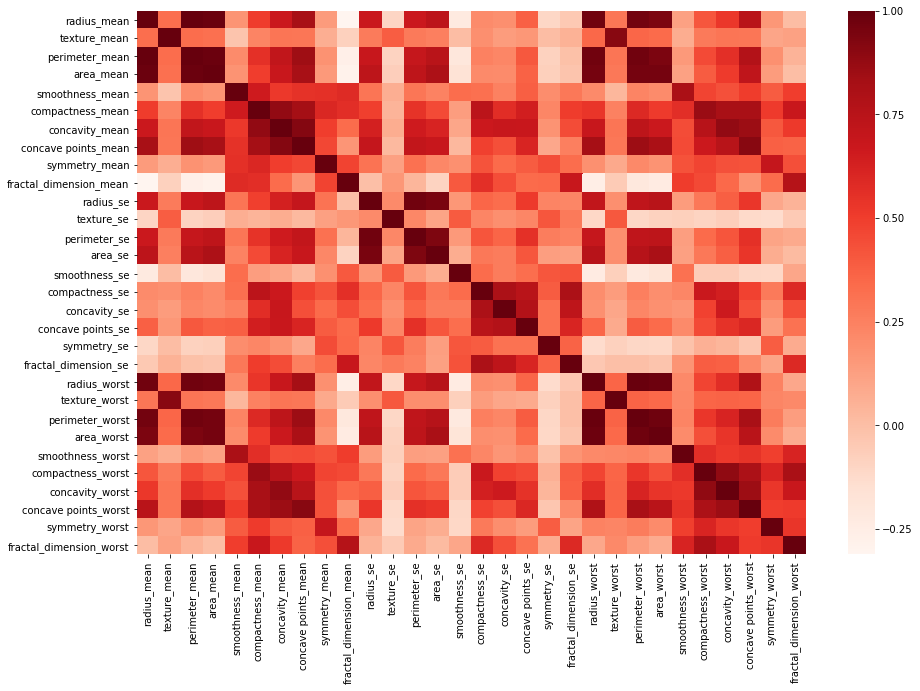

In [201]:
plt.figure(figsize=(15,10))
sns.heatmap(df[cols].corr(), cmap='Reds')

In [202]:
from skfeature.function.similarity_based import fisher_score

In [203]:
idx = fisher_score.fisher_score(X_train, y_train)

In [204]:
np.array(cols)[idx[0:5]]

array(['perimeter_mean', 'concave points_mean', 'fractal_dimension_mean',
       'perimeter_worst', 'concavity_mean'], dtype='<U23')

In [205]:
selected_features_fisher_train = np.array(X_train)[:, idx[0:5]]

In [206]:
selected_features_fisher_test = np.array(X_test)[:, idx[0:5]]

In [207]:
# to do for Jin: loop through number of features

In [208]:
clf = LogisticRegressionCV()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9912280701754386

In [209]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
clf.fit(selected_features_fisher_train, y_train)
clf.score(selected_features_fisher_test, y_test)

0.956140350877193

In [2]:
# Wrapper

In [210]:
from sklearn.feature_selection import RFE

In [211]:
clf = LogisticRegressionCV()

In [212]:
selector = RFE(clf, 5, step=1)

In [213]:
selector = selector.fit(X_train, y_train)

In [214]:
np.array(cols)[selector.support_]

array(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'], dtype='<U23')

In [215]:
selector.score(X_test, y_test)

0.9649122807017544

In [3]:
# Embedded

In [263]:
from sklearn.linear_model import SGDClassifier

In [294]:
el = SGDClassifier(loss='log', penalty='elasticnet', max_iter=10000, random_state = 777, l1_ratio=1)

In [295]:
y_train_coded = pd.Series(y_train).astype('category').cat.codes
y_test_coded = pd.Series(y_test).astype('category').cat.codes

In [296]:
el.fit(X_train, y_train_coded)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=1, learning_rate='optimal',
       loss='log', max_iter=10000, n_iter=None, n_jobs=1,
       penalty='elasticnet', power_t=0.5, random_state=777, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [297]:
el.score(X_test, y_test_coded)

0.9736842105263158

In [298]:
el.coef_

array([[-16.07767958,   5.19610268, -14.8540355 ,  -5.17425737,
          6.11101455, -31.97247951,  27.01208035,   8.90424827,
         -4.76866764,   7.53346175,  14.07646495,  -3.23263791,
          0.        ,  31.85269253,   4.73009471,  11.59752796,
        -14.67443491,   6.31143875,  -8.92582492, -19.28988065,
         17.61728062,   8.47772059,  12.35371417,  21.58750514,
         -4.27036103,  -9.44433455,   3.58089744,  20.56535459,
         12.4127925 ,  15.78615264]])

In [301]:
np.array(cols)[np.where(el.coef_ == 0)[1]]

array(['perimeter_se'], dtype='<U23')